In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for adf test
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### Combine Dataframes

In [3]:
btc_df = pd.read_csv('BTC-USD.csv', index_col='Date') # data from yahoo finance
btc_df = btc_df[['Close', 'Volume']]
btc_df.head()

,Close,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


In [4]:
btc_df.columns = ['btc_close','btc_volume']

In [5]:
btc_price = btc_df[['btc_close']]

In [6]:
btc_volume = btc_df[['btc_volume']]

In [7]:
assets_df = pd.read_csv('Asset_Classes.csv', index_col='Date', parse_dates=True)
assets_df.head()

,SPX_Close,SPX_Volume,MCHI_Close,MCHI_Volume,EEM_Close,EEM_Volume,GLD_Close,GLD_Volume,AGG_Close,AGG_Volume,TIPS_Close,TIPS_Volume,VIX_Close
Date,,,,,,,,,,,,,
2014-09-02,2002.280029,2819980000,45.786396,379600,39.657051,48129000,121.650002,10128600,95.206429,1029300,105.180908,1123900,12.25
2014-09-03,2000.719971,2809980000,47.138927,160800,40.177124,51700200,122.150002,3414600,95.310799,1311700,105.373947,1067500,12.36
2014-09-04,1997.650024,3072410000,47.175240,283900,40.071346,41676700,121.480003,7310600,95.189034,1308900,104.978714,312100,12.64
2014-09-05,2007.709961,2818300000,47.583721,435700,40.415112,53035700,122.059998,3490100,95.136841,798500,104.868408,327800,12.09
2014-09-08,2001.540039,2789090000,47.320480,284000,39.939129,50222700,120.730003,7506500,95.041168,895300,104.611053,320800,12.66


In [8]:
assets_df.columns = [x.lower() for x in assets_df.columns]

In [9]:
assets_df.head()

,spx_close,spx_volume,mchi_close,mchi_volume,eem_close,eem_volume,gld_close,gld_volume,agg_close,agg_volume,tips_close,tips_volume,vix_close
Date,,,,,,,,,,,,,
2014-09-02,2002.280029,2819980000,45.786396,379600,39.657051,48129000,121.650002,10128600,95.206429,1029300,105.180908,1123900,12.25
2014-09-03,2000.719971,2809980000,47.138927,160800,40.177124,51700200,122.150002,3414600,95.310799,1311700,105.373947,1067500,12.36
2014-09-04,1997.650024,3072410000,47.175240,283900,40.071346,41676700,121.480003,7310600,95.189034,1308900,104.978714,312100,12.64
2014-09-05,2007.709961,2818300000,47.583721,435700,40.415112,53035700,122.059998,3490100,95.136841,798500,104.868408,327800,12.09
2014-09-08,2001.540039,2789090000,47.320480,284000,39.939129,50222700,120.730003,7506500,95.041168,895300,104.611053,320800,12.66


In [10]:
volume=[] # create separate volume df
price=[] # create separate price df
for i, col in enumerate(assets_df.columns):
    if i%2 == 0:
        price.append(col)
    else:
        volume.append(col)
        
print(volume)
print(price)

['spx_volume', 'mchi_volume', 'eem_volume', 'gld_volume', 'agg_volume', 'tips_volume']
['spx_close', 'mchi_close', 'eem_close', 'gld_close', 'agg_close', 'tips_close', 'vix_close']


In [11]:
asset_prices = assets_df[price]

In [12]:
asset_volumes = assets_df[volume]

In [13]:
df_prices = btc_price.join(asset_prices, how='left')
df_prices.head(7)

,btc_close,spx_close,mchi_close,eem_close,gld_close,agg_close,tips_close,vix_close
Date,,,,,,,,
2014-09-17,457.334015,2001.569946,45.268986,38.546410,117.540001,94.371346,102.938339,12.65
2014-09-18,424.440002,2011.359985,45.250820,38.599300,117.779999,94.380081,102.671791,12.03
2014-09-19,394.795990,2010.400024,44.796963,38.308414,117.089996,94.536613,102.975075,12.11
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,402.152008,1994.290039,43.998154,37.726654,116.849998,94.667091,102.901558,13.69
2014-09-23,435.790985,1982.770020,43.762142,37.515102,117.599998,94.754097,103.287560,14.93


In [14]:
# linearly fill missing weekend and holiday data from stocks, bonds, vix, and gold
df_prices.interpolate(method='linear', inplace=True) 

In [15]:
df_volumes = btc_volume.join(asset_volumes, how='left')
df_volumes.head(7)

,btc_volume,spx_volume,mchi_volume,eem_volume,gld_volume,agg_volume,tips_volume
Date,,,,,,,
2014-09-17,21056800,3.209420e+09,371900.0,76121700.0,8328700.0,707200.0,648700.0
2014-09-18,34483200,3.235340e+09,89700.0,50513900.0,5368700.0,707600.0,493400.0
2014-09-19,37919700,4.880220e+09,271400.0,88033100.0,10930200.0,929900.0,391100.0
2014-09-20,36863600,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,26580100,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,24127600,3.349670e+09,367600.0,83094000.0,7601600.0,592400.0,1131400.0
2014-09-23,45099500,3.279350e+09,423100.0,82990700.0,4664800.0,705200.0,571300.0


In [16]:
df_volumes.interpolate(method='linear', inplace=True)

In [17]:
anxiety_index = pd.read_csv('Investopedia_anxiety_index.csv', index_col='Date', parse_dates=True)

In [18]:
# fill feb 2020 when data comes out
df = df_prices.join(anxiety_index, how='left').fillna(method='bfill')

In [19]:
df.rename(columns={'IAI Value':'iai_value'}, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2014-09-17 to 2020-02-17
Data columns (total 9 columns):
btc_close     1980 non-null float64
spx_close     1980 non-null float64
mchi_close    1980 non-null float64
eem_close     1980 non-null float64
gld_close     1980 non-null float64
agg_close     1980 non-null float64
tips_close    1980 non-null float64
vix_close     1980 non-null float64
iai_value     1963 non-null float64
dtypes: float64(9)
memory usage: 154.7 KB


In [21]:
# pull in and separate ETH price and volume
eth_df = pd.read_csv('ETH.csv', index_col='Date', parse_dates=True)
eth_df.rename(columns={'Close**':'eth_close', 'Volume':'volume'}, inplace=True)
eth_price = eth_df['eth_close']
eth_volume = eth_df['volume']

In [22]:
# this df includes ethereum, which cuts off over 300 early observations, but is worth including for cointegration reasons
df = df.join(eth_price, how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2014-09-17 to 2020-02-17
Data columns (total 10 columns):
btc_close     1980 non-null float64
spx_close     1980 non-null float64
mchi_close    1980 non-null float64
eem_close     1980 non-null float64
gld_close     1980 non-null float64
agg_close     1980 non-null float64
tips_close    1980 non-null float64
vix_close     1980 non-null float64
iai_value     1963 non-null float64
eth_close     1656 non-null object
dtypes: float64(9), object(1)
memory usage: 250.2+ KB


In [23]:
df = df[~df['eth_close'].isna()]
df.head()

,btc_close,spx_close,mchi_close,eem_close,gld_close,agg_close,tips_close,vix_close,iai_value,eth_close
Date,,,,,,,,,,
2015-08-07,279.584991,2077.570068,46.110725,32.698902,104.650002,97.121048,103.066452,13.390000,109.15,2.77
2015-08-08,260.997009,2086.440023,46.462504,32.882065,105.006668,97.079536,103.017403,13.003333,109.15,0.753325
2015-08-09,265.083008,2095.309977,46.814282,33.065227,105.363335,97.038025,102.968353,12.616667,109.15,0.701897
2015-08-10,264.470001,2104.179932,47.166061,33.248390,105.720001,96.996513,102.919304,12.230000,109.15,0.708448
2015-08-11,270.385986,2084.070068,46.582840,32.518738,106.260002,97.316696,103.342316,13.710000,109.15,1.07


In [ ]:
# ETH prices are strings, convert to floats
def remove_commas(row):
    return row.replace(',', '')
    
df['eth_close'] = df['eth_close'].apply(remove_commas)
df['eth_close'] = df['eth_close'].astype(float)

### Create Features
#### Daily Log Return

In [89]:
# calculate daily log return
df['btc_return'] = np.log(df.btc_close/df.btc_close.shift(1))

C:\Users\achil\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Moving Averages

In [25]:
# adds SMA columns to dataframe
days = [7, 14, 20, 50]
periods = [str(x)+'D' for x in days]
for n in periods:
    df[n] = df.btc_close.rolling(n).mean()


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1656 entries, 2015-08-07 to 2020-02-17
Data columns (total 14 columns):
btc_close     1656 non-null float64
spx_close     1656 non-null float64
mchi_close    1656 non-null float64
eem_close     1656 non-null float64
gld_close     1656 non-null float64
agg_close     1656 non-null float64
tips_close    1656 non-null float64
vix_close     1656 non-null float64
iai_value     1639 non-null float64
eth_close     1656 non-null object
7D            1656 non-null float64
14D           1656 non-null float64
20D           1656 non-null float64
50D           1656 non-null float64
dtypes: float64(13), object(1)
memory usage: 194.1+ KB


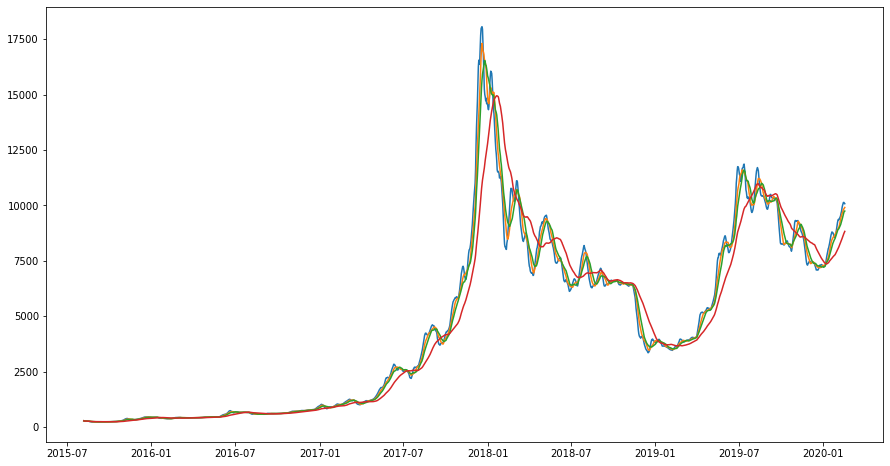

In [30]:
_=plt.figure(figsize=(15,8))
for y in periods:
    _= plt.plot(df.index, df[y])
    

#### Relative Strength Index

In [31]:
import talib

In [32]:
# calculate RSI features and add to df

# selected time periods 7, 14, 30, 50 days
for n in days:
    # Create the RSI indicator
    df['rsi' + str(n)] = talib.RSI(df['btc_close'].values, timeperiod=n)

#### Cointegrated Prices
Even if two prices follow a random walk, it's possible that a linear combination of them does not follow a random walk. So even though the individual prices themselves are not forecastable because they're random walks, the linear combination is forecastable. 

Below I will test for cointegration of various asset prices with bitcoin prices. I will do this in two parts: First, regress bitcoin prices on other asset prices to get the slope coefficient m. Second, run the Augmented Dickey Fuller test on the linar combination of each series pair to determine whether it's a random walk. The null hypothesis is no cointegration. I'm setting a 10% significance level for rejecting the null. Any assets that pass the test will be included in the model.

The implication of cointegrated pairs is that there are economic forces linking the two prices. They can be economic substitutes. Investment assets can be roughly divided into two categories - Risk-on and Risk-off. For example, stocks are Risk-on assets and bonds are Risk-off. During times of heightened uncertainty, investors seek shelter in safer assets. The opposite is true during times of optimism or exuberance.

In [73]:
def adf_test():
    # Regress BTC on other assets
    adf_stats_list = []
    asset_classes = [x for x in df.columns if 'close' in x][1:]
    BTC = df[['btc_close']]
    for asset in asset_classes:
        ASSET = sm.add_constant(df[[asset]])
        result = sm.OLS(BTC,ASSET).fit()

        # Compute ADF of prices and make dataframe
        b = result.params[1]
        adf_stats = adfuller(BTC['btc_close'] - b*ASSET[asset])
        adf_stats_list.append((asset, adf_stats[1], b))
        adf_df = pd.DataFrame(adf_stats_list, columns = ['asset','ADF p-value', 'slope coef'])
    
    return adf_df.sort_values('ADF p-value')


In [74]:
adf_df = adf_test()
adf_df 

,asset,ADF p-value,slope coef
1,mchi_close,0.002393,338.681703
2,eem_close,0.003118,600.181084
0,spx_close,0.024696,8.744135
7,eth_close,0.087842,12.706555
3,gld_close,0.131093,228.228387
5,tips_close,0.150064,657.476316
4,agg_close,0.194916,552.062866
6,vix_close,0.500452,-112.887663


**Results:** Reject the null hypotheses that asset pairs are not cointegrated for the S&P 500 (US stocks), MCHI ETF (Chinese stocks), EEM ETF (emerging market equities), and ether (a cryptocurrency). Surprisingly gold missed the significance threshold with a p-value of 13%. 

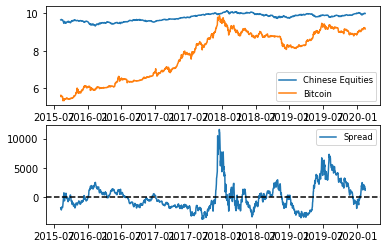

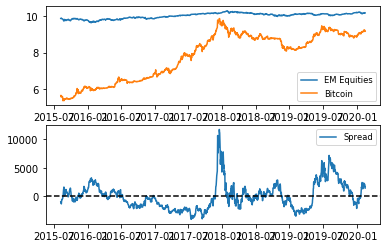

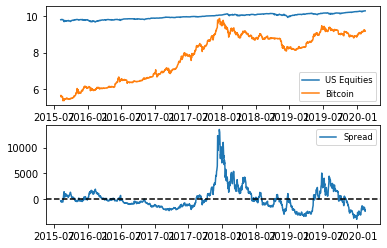

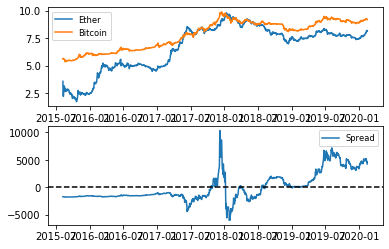

In [93]:
# Cointegration Plots
'''This function plots the log price of bitcoin vs cointegrated assets in the top chart
and plots the mean adjusted spread in the bottom chart'''
p_crit = 0.10
passed_adf = adf_df[adf_df['ADF p-value'] <= p_crit].reset_index(drop=True)
coint_assets = passed_adf.asset.to_list()
labels = ['Chinese Equities', 'EM Equities', 'US Equities', 'Ether']
b = passed_adf.iloc[:,2]

for i, asset in enumerate(coint_assets):
    # Plot the prices separately
    plt.subplot(2,1,1)
    plt.plot(np.log(b[i]*df[asset]), label=labels[i])
    plt.plot(np.log(df.btc_close), label='Bitcoin')
    plt.legend(loc='best', fontsize='small')

    # Plot the spread
    spread = df.btc_close - b[i]*df[asset]
    mean = spread.mean()
    plt.subplot(2,1,2)
    plt.plot(spread - mean, label='Spread')
    plt.legend(loc='best', fontsize='small')
    plt.axhline(y=0, linestyle='--', color='k')
    plt.show()

**Cointegrated Plot Discussion:** There are substantial price level differences between bitcoin and cointegrated assets, so I log scaled the prices for better visualization. I also adjusted the spread to center around zero by subtracting the mean difference; this also produces a better visualization. For all of the plots, the spread clearly shows mean reversion. This implies that there is an economic relationship between these assets and bitcoin such that including them in the model should improve the forecast. Last, looking at Chinese equities and emerging market equities, the spread to bitcoin is almost exactly the same. **Because Chinese equities and emerging market equitites are strongly correlated and because China accounts for 2/3rd of bitcoin mining alone, I will use Chinese equities only (dropping EM equities).**

#### Add Cointegrated Pairs to df 

In [94]:
# adding the mean adjusted log price difference of the cointegrated pairs to the df
for i, asset in enumerate(coint_assets):
    spread = df.btc_close - b[i]*df[asset]
    mean = spread.mean()
    df[f'{asset}_coint'] = spread - mean
    

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1656 entries, 2015-08-07 to 2020-02-17
Data columns (total 22 columns):
btc_close           1656 non-null float64
spx_close           1656 non-null float64
mchi_close          1656 non-null float64
eem_close           1656 non-null float64
gld_close           1656 non-null float64
agg_close           1656 non-null float64
tips_close          1656 non-null float64
vix_close           1656 non-null float64
iai_value           1639 non-null float64
eth_close           1656 non-null float64
7D                  1656 non-null float64
14D                 1656 non-null float64
20D                 1656 non-null float64
50D                 1656 non-null float64
rsi7                1649 non-null float64
rsi14               1642 non-null float64
rsi20               1636 non-null float64
rsi50               1606 non-null float64
mchi_close_coint    1656 non-null float64
eem_close_coint     1656 non-null float64
spx_close_coint     1656 non-null f

#### Analyze Lag Cointegrated Pairs
Because the objective is to use information available at time t to make actionable trade decisions for time t + 1, I'm interested in whether I can incorporate lags of the cointegrated pairs into my model.

mchi_close autocorrelation of daily price differences is 99.83%
eem_close autocorrelation of daily price differences is 99.81%
spx_close autocorrelation of daily price differences is 99.91%
eth_close autocorrelation of daily price differences is 99.66%


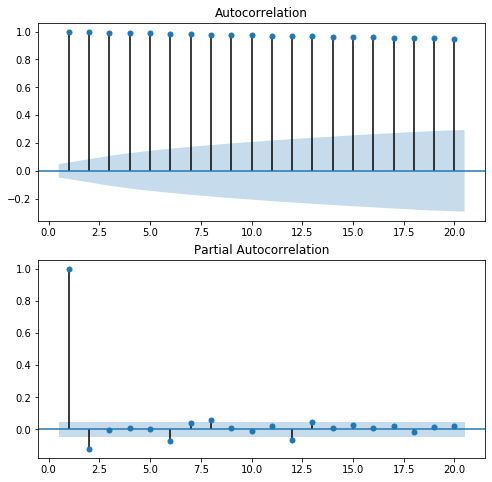

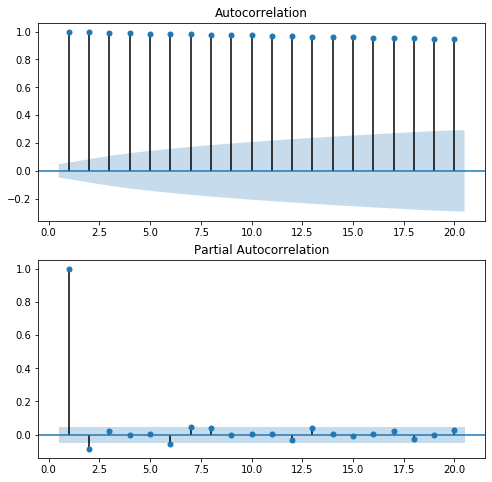

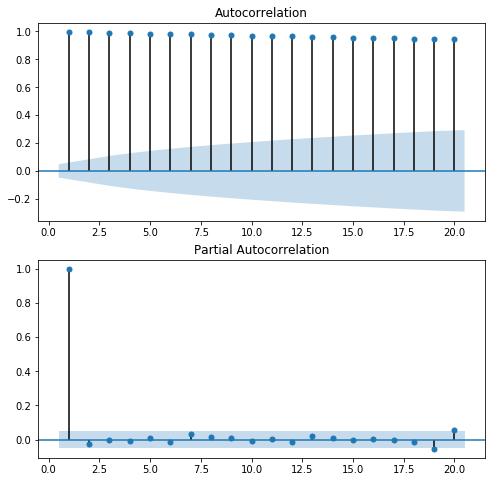

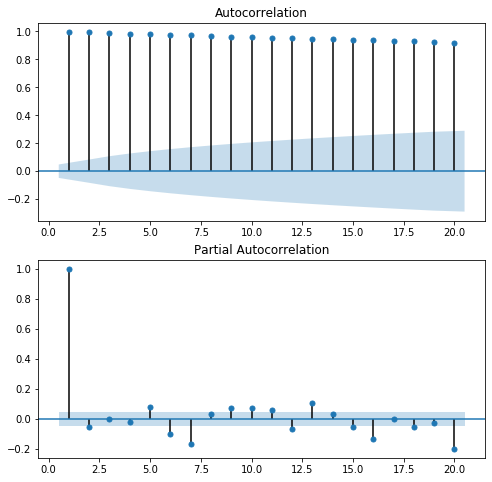

In [99]:
# analizing lags for cointegrated variables
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for asset in coint_assets:
    # the autocorrelation plot on log daily returns shows significant lags at 6 and 10 at the 95% confidence level 
    '''not sure why the plots print twice, but ignore the last two'''
    autocorrelation = df[asset].autocorr()
    print(f'{asset} autocorrelation of daily price differences is {round(autocorrelation*100,2)}%')
    fig, ax = plt.subplots(2,1, figsize=(8,8))

    plot_acf(df[asset], zero=False, lags=20, ax=ax[0])
    plot_pacf(df[asset], zero=False, lags=20, ax=ax[1])

**Result:** The ACF plots tail off and the PACF plots drop of at lag on, indicating that lag 1 contains pretty much all the information. Furthermore, I can use lag 1 cointegrated price differences because they contain close to 100% of the information about price difference at time t.  

In [100]:
# add 1 day lagged cointegrated price differences to df
for i, asset in enumerate(coint_assets):
    df[f'{asset}_lag'] = df[f'{asset}_coint'].shift(1)

In [101]:
df.head()

,btc_close,spx_close,mchi_close,eem_close,gld_close,agg_close,tips_close,vix_close,iai_value,eth_close,...,rsi20,rsi50,mchi_close_coint,eem_close_coint,spx_close_coint,eth_close_coint,mchi_close_lag,eem_close_lag,spx_close_lag,eth_close_lag
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-07,279.584991,2077.570068,46.110725,32.698902,104.650002,97.121048,103.066452,13.390000,109.15,2.770000,...,NaN,NaN,-1891.155473,-1038.895601,-402.305199,-1761.880523,NaN,NaN,NaN,NaN
2015-08-08,260.997009,2086.440023,46.462504,32.882065,105.006668,97.079536,103.017403,13.003333,109.15,0.753325,...,NaN,NaN,-2028.884454,-1167.414351,-498.453263,-1754.843513,-1891.155473,-1038.895601,-402.305199,-1761.880523
2015-08-09,265.083008,2095.309977,46.814282,33.065227,105.363335,97.038025,102.968353,12.616667,109.15,0.701897,...,NaN,NaN,-2143.939453,-1273.259120,-571.927345,-1750.104041,-2028.884454,-1167.414351,-498.453263,-1754.843513
2015-08-10,264.470001,2104.179932,47.166061,33.248390,105.720001,96.996513,102.919304,12.230000,109.15,0.708448,...,NaN,NaN,-2263.693458,-1383.802895,-650.100434,-1750.800289,-2143.939453,-1273.259120,-571.927345,-1750.104041
2015-08-11,270.385986,2084.070068,46.582840,32.518738,106.260002,97.316696,103.342316,13.710000,109.15,1.070000,...,NaN,NaN,-2060.251191,-939.963582,-468.341082,-1749.478384,-2263.693458,-1383.802895,-650.100434,-1750.800289


### Additional Feature Engineering for Non-Linear Models
I'm going to use non-linear models to try to improve my predictions. With linear models, features must be linearly correlated to the target. Other machine learning models can combine features in non-linear ways. For example, what if the price goes up when the moving average of price is going up, and the moving average of volume is going down? The only way to capture those interactions is to either multiply the features (interaction variables), or to use a machine learning algorithm that can handle non-linearity (e.g. random forests, knn, neural networks).
#### Day of Week Categorical Variables

In [103]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(df.index.dayofweek,
                              prefix='day',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week.index = df.index

# Join the dataframe with the days of week dataframe
df = pd.concat([df, days_of_week], axis=1)

In [ ]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change for bitcoin
features = ['Volume_1d_change', 'Volume_1d_change_SMA']

df_volumes['Volume_1d_change'] = df_volumes['btc_volume'].pct_change()
df_volumes['Volume_1d_change_SMA'] = df_volumes['Volume_1d_change'].rolling(5).mean()

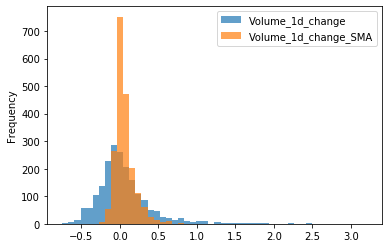

In [105]:
# Plot histogram of volume % change data
df_volumes[features].plot(kind='hist', sharex=False, bins=50, alpha=0.7)

Moving average of volume changes has a much smaller range than the raw data.

In [111]:
df = df.join(df_volumes[features], how='left')

In [112]:
df.to_csv('trade_df.csv')